# Análise Sobre Carros Usados a Venda na Alemanha
# Analyse about Second Hand Vehicles on Sale in Germany  

### Análise exploratória do conjunto de dados fornecido pelo Kaggle referente aos carros usados disponíveis para venda no site Ebay na Alemanha
### A presente pesquisa tem como objetivo analisar e identificar padrões de comportamento e características dos dados 

### Data Analyse from Kaggle Open DataBase about second hand vehicles on sale at Ebay Germany
### The presest research has the goal to analyse and identify behaviors patterns 

## Importações / Imports

In [113]:
# Importando os pacotes / Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# DataSet
dados = pd.read_csv("autos.csv", encoding="latin1")

In [3]:
# Amostra dos dados / Summary data
dados.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# Atributo dos dados / Titles
list(dados)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

## Editando Atributos / Editing Titles

In [5]:
# Editando atributos / Editing titles
dados["seller"].value_counts()
# Percebe-se que mais de 99% é referente a "privado", então vamos excluir 
# We can realize that more than 99% referes to "privat", so we can exclude 

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [6]:
# Editando atributos / Editing titles
dados["offerType"].value_counts()
# Percebe-se que mais de 99% é referente a "angebot", então vamos excluir 
# We can realize that more than 99% referes to "angebot", so we can exclude 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [7]:
# Removendo atributos / Removing titles
# Vamos remover também os atributos "dateCrawled", "dateCreated", "postalCode","nrOfPictures" e "lastSeen"
# Once we won't use it let's exclude also "dateCrawled", "dateCreated", "postalCode","nrOfPictures" e "lastSeen"
dados.drop(["offerType","seller","dateCrawled", "dateCreated", "postalCode", "lastSeen", "nrOfPictures"],axis=1, inplace=True)

In [8]:
# Atributos restantes / Remaining titles
list(dados)

['name',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage']

## Outliers

In [9]:
# Ouliers "price"
ot = dados.loc[dados.price <= 10]
len(ot)
# Percebemos que muitos valores são menores a Euros10,00
# We can see plenty of values less than Euro10,00

12118

In [10]:
# Ouliers "price"
ot = dados.loc[dados.price > 100000]
len(ot)
# Percebemos também preços abusivos 
# Also we can see hight prices

403

In [11]:
# Removendo outliers "price"
# Removing the outliers "price"
dados = dados[dados.price > 10]
dados = dados[dados.price < 100000]

In [12]:
# Outliers "yearOfRegistration"
ot = dados.loc[dados.yearOfRegistration <= 1900]
len(ot)
# Percebe-se que 49 estão registrados a anos inferiores a 1900
# We can see 49 vehicles registered older than year 1900

49

In [13]:
# Outliers "yearOfRegistration"
ot = dados.loc[dados.yearOfRegistration > 2022]
len(ot)
# Percebemos 89 veículos registrados no ano acima de 2022, sendo que estamos em 2020
# We are in 2020 and 89 cars are registered in the future

89

In [14]:
# Removendo os outliers "yearOfRegistration" 
# Removing outliers "yearOfRegistration"
dados = dados[dados.yearOfRegistration > 1900]
dados = dados[dados.yearOfRegistration < 2022]

## Valores nulos / Null values

In [15]:
# Identificando valores nulos
# Identify null values
dados.isnull().sum().sort_values(ascending=False)

notRepairedDamage      65848
vehicleType            33397
fuelType               29260
model                  17843
gearbox                17098
brand                      0
monthOfRegistration        0
kilometer                  0
powerPS                    0
yearOfRegistration         0
abtest                     0
price                      0
name                       0
dtype: int64

In [16]:
# Analisando "notRepairedDamage" / Analyse "notRepairedDamage"
dados["notRepairedDamage"].value_counts()
# Vamos substituir os valores nulos por "unspecified"
# We are going to replace the null values to "unspecified"

nein    259023
ja       33992
Name: notRepairedDamage, dtype: int64

In [17]:
# Substituindo / Replacing "notRepairedDamage"
dados["notRepairedDamage"].fillna("unspecified", inplace=True)

In [18]:
# Analisando / Analyse "vehicleType"
dados["vehicleType"].value_counts()
# Vamos substituir os valores nulos por "unspecified"
# Let's replace the null values to "unspecified"

limousine     93595
kleinwagen    78012
kombi         65917
bus           29696
cabrio        22420
coupe         18239
suv           14464
andere         3123
Name: vehicleType, dtype: int64

In [19]:
# Substituindo / Replacing "vehicleType"
dados["vehicleType"].fillna("unspecified", inplace=True)

In [20]:
# Analisando / Analyse "fuelType"
dados["fuelType"].value_counts()
# Vamos substituir por "benzin"
# Let's replace to "benzin"

benzin     217309
diesel     105989
lpg          5222
cng           556
hybrid        268
andere        164
elektro        95
Name: fuelType, dtype: int64

In [21]:
# Substituindo / Replacing "fuelType"
dados["fuelType"].fillna("benzin", inplace=True)

In [22]:
# Analisando / Analyse "model"
dados["model"].value_counts()
# Vamos substituir por "unspecified"
# Let's replace to "unspecified"

golf               28974
andere             25483
3er                19900
polo               12601
corsa              12143
                   ...  
serie_2                8
rangerover             6
serie_3                3
serie_1                1
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [23]:
# Substituindo / Replacing "model"
dados["model"].fillna("unspecified", inplace=True)

In [24]:
# Analisando / Analyse "gearbox"
dados["gearbox"].value_counts()
# Vamos substituir por "unspecified"
# Let's replace to "unspecified"

manuell      266387
automatik     75378
Name: gearbox, dtype: int64

In [25]:
# Substituindo / Replacing "gearbox"
dados["gearbox"].fillna("unspecified", inplace=True)

In [26]:
# Valores nulos
# Null values
dados.isnull().sum().sort_values(ascending=False)

notRepairedDamage      0
brand                  0
fuelType               0
monthOfRegistration    0
kilometer              0
model                  0
powerPS                0
gearbox                0
yearOfRegistration     0
vehicleType            0
abtest                 0
price                  0
name                   0
dtype: int64

##  Análise de dados / Data Analyse 

### Total de Veículos Conforme sua Categoria / Vehicles Amount by Category

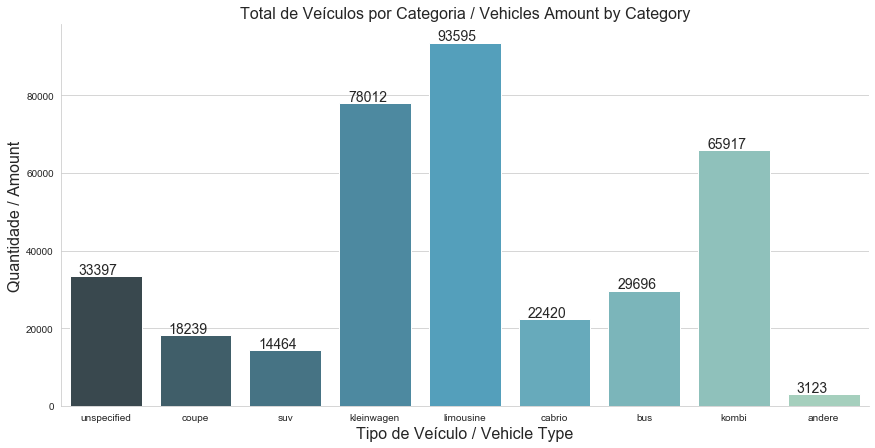

In [107]:
# Gráfico referente ao número total de veículos a venda por categoria
# Chart of vehicles amount on sale by category
sns.set_style("whitegrid")
g = sns.catplot(x="vehicleType", data=dados, kind="count", palette="GnBu_d", height=6, aspect=2)
g.ax.xaxis.set_label_text("Tipo de Veículo / Vehicle Category", fontsize=16)
g.ax.yaxis.set_label_text("Quantidade / Amount", fontsize=16)
g.ax.set_title("Total de Veículos por Categoria / Vehicles Amount by Category", fontsize=16)
# Contagem no topo das barras / To get count on top of bars
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500), fontsize=14)

### Total de Veículos por Marca / Vehicles Amount by Brand

Text(0.5, 1, 'Total de Veículos por Marca / Vehicles Amount by Brand')

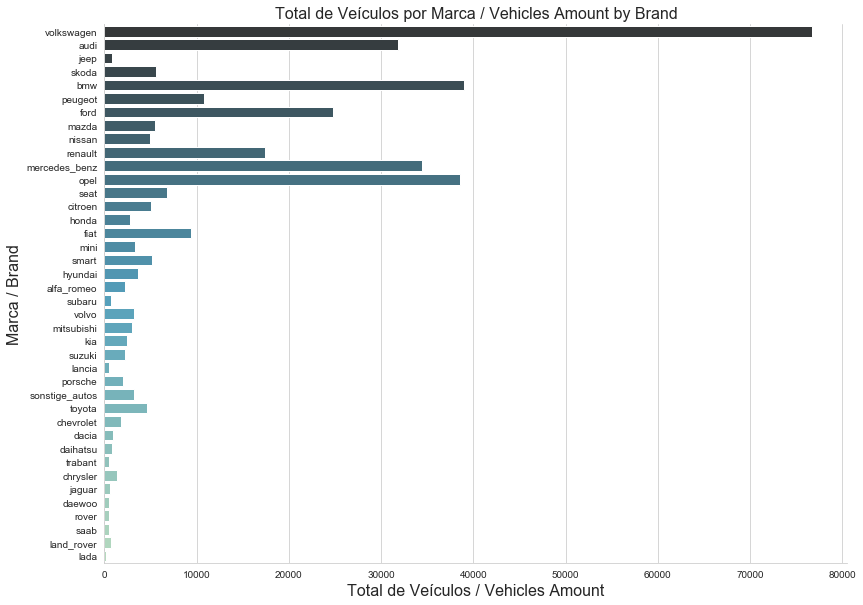

In [108]:
# Gráfico referente ao número total de veículos a venda conforme sua marca
# Chart refers to vehicles amount on sale by brand 
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=dados, kind="count", palette="GnBu_d", height=8, aspect=1.5)
g.ax.xaxis.set_label_text("Total de Veículos / Vehicles Amount", fontsize=16)
g.ax.yaxis.set_label_text("Marca / Brand", fontsize=16)
g.ax.set_title("Total de Veículos por Marca / Vehicles Amount by Brand", fontsize=16)

### Distribuição de Veículos Conforme Ano de Registro / Vehicles Distribution by Year of Registration

Text(0.5, 1.0, 'Veículos por Ano de Registro / Vehicles by Year Registration')

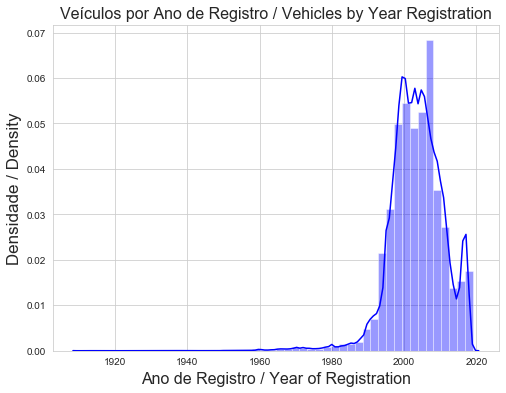

In [109]:
# Distribuição cronológica do ano de registro do carros a venda
# Cronologic distribution of vehicle's year of registration
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(dados["yearOfRegistration"], kde=True, color="r", ax=ax)
plt.xlabel("Ano de Registro / Year of Registration", fontsize=16)
plt.ylabel("Densidade / Density", fontsize=17)
ax.set_title("Veículos por Ano de Registro / Vehicles by Year of Registration", fontsize=16)

### Variação do Preço de Venda por Categoria / Price Variation by Category

Text(0.5, 1.0, 'Preço de Venda por Categoria / Sale Price by Category')

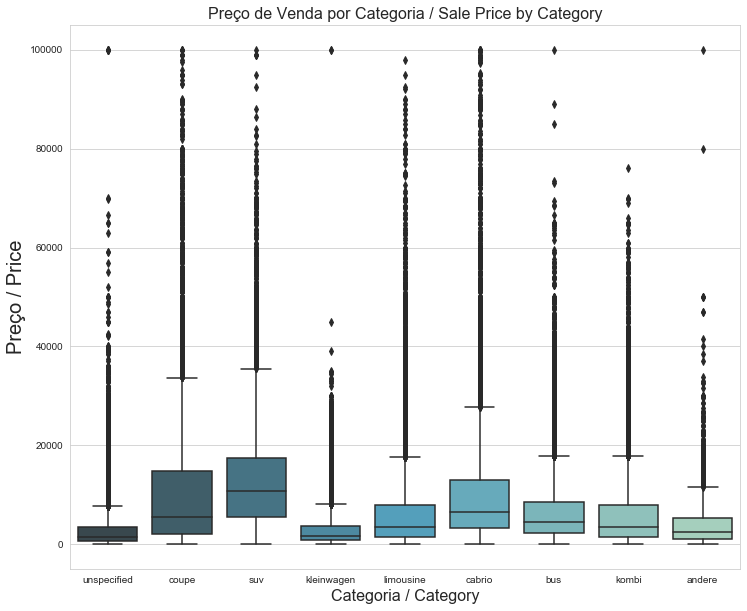

In [110]:
# Gráfico referente a variação do preço de venda dos veículos por categoria
# Chart refers to the variation of vehicles on sale by category 
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x="vehicleType", y="price", data=dados, palette="GnBu_d")
ax.xaxis.set_label_text("Categoria / Category", fontsize=16)
ax.yaxis.set_label_text("Preço / Price", fontsize=20)
ax.set_title("Preço de Venda por Categoria / Sale Price by Category", fontsize=16)

### Preço Médio Conforme Categoria e Câmbio / Vehicle Avarege Price by Category and Gearbox

Text(0.5, 1, 'Preço Médio por Categoria e Câmbio / Avarage Price by Category and Gearbox')

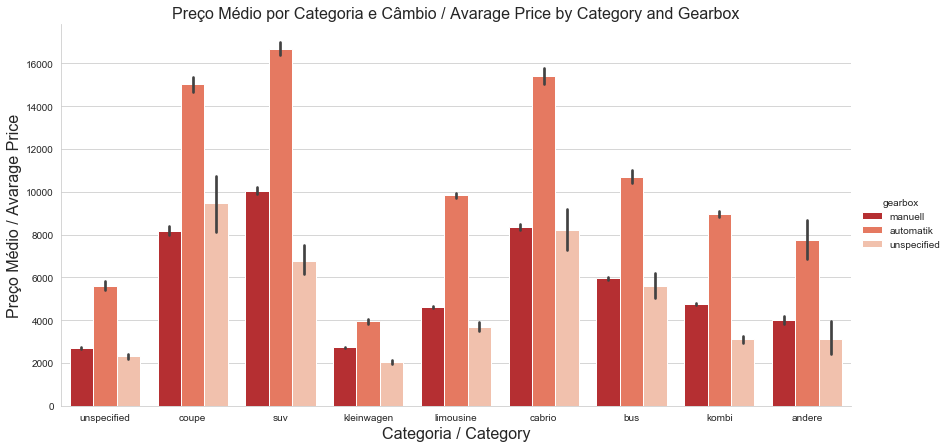

In [112]:
# Gráfico que demostra a relação entre preço médio de venda por categoria e câmbio
# Chart that show us the relation of vehicle avarege price by category and gearbox
sns.set_style("whitegrid")
g = sns.catplot(x="vehicleType", y="price", hue="gearbox", data=dados, kind="bar", palette="Reds_r", height=6, aspect=2)
g.ax.xaxis.set_label_text("Categoria / Category", fontsize=16)
g.ax.yaxis.set_label_text("Preço Médio / Avarage Price", fontsize = 16)
g.ax.set_title("Preço Médio por Categoria e Câmbio / Avarage Price by Category and Gearbox", fontsize=16)

### Preço Médio dos Veículos Conforme Combustível e Câmbio / Vehicle Avarege Price by Fuel and Gearbox

Text(0.5, 1, 'Preço Médio por Tipo de Combustível e Câmbio / Avareg Price by Fuel Type and Gearbox')

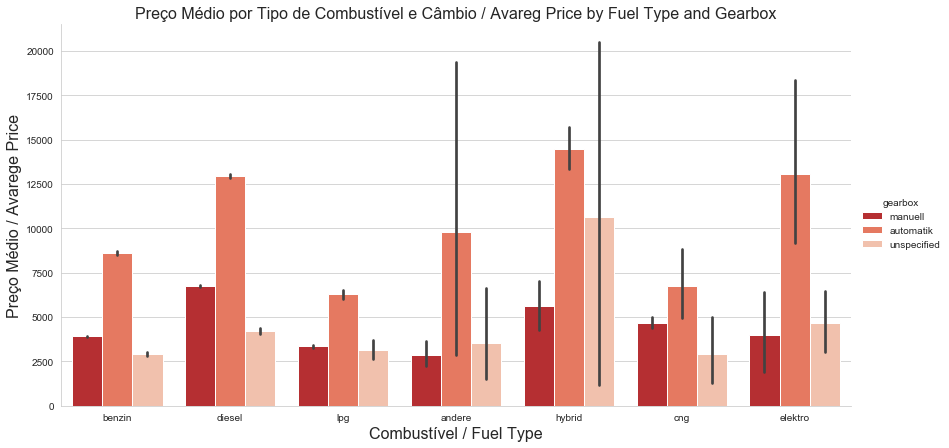

In [79]:
# Gráfico referente ao preço médio de venda conforme tipo de combustível e câmbio
# Chart refers to the vehicle avarage price by fuel type and gearbox
sns.set_style("whitegrid")
g = sns.catplot(x="fuelType", y="price", hue="gearbox", data=dados, kind="bar", palette="Reds_r", height=6, aspect=2)
g.ax.xaxis.set_label_text("Combustível / Fuel Type", fontsize=16)
g.ax.yaxis.set_label_text("Preço Médio / Avarege Price", fontsize=16)
g.ax.set_title("Preço Médio por Tipo de Combustível e Câmbio / Avarage Price by Fuel Type and Gearbox", fontsize=16)

### Potência Média por Categoria e Câmbio / Avarege PS Power of Vehicle by Category and Gearbox

Text(0.5, 1, 'Potência Média por Categoria e Câmbio / Avarage PS Power by Category and Gearbox')

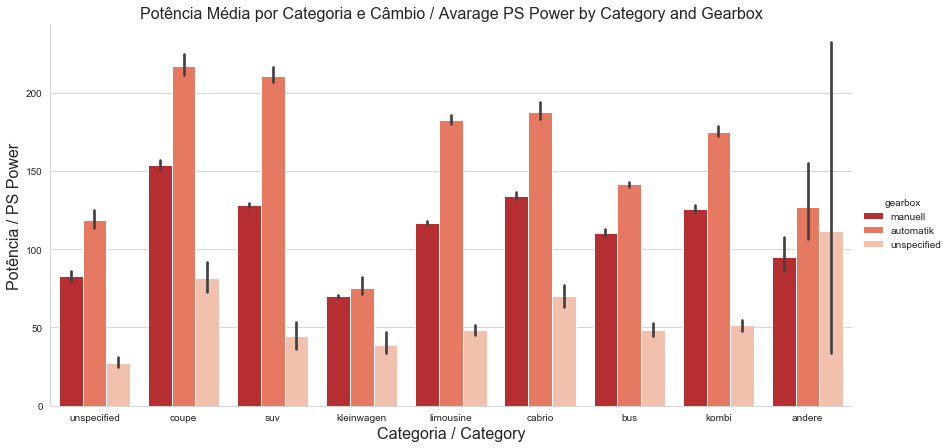

In [83]:
# Gráfico referente a potência média dos veículos a venda por categoria e câmbio
# Chart refers to the vehicle avarege PS power by category and gearbox
sns.set_style("whitegrid")
g = sns.catplot(x="vehicleType", y="powerPS", hue="gearbox", data=dados, kind="bar", palette="Reds_r", height=6, aspect=2)
g.ax.xaxis.set_label_text("Categoria / Category", fontsize=16)
g.ax.yaxis.set_label_text("Potência / PS Power", fontsize = 16)
g.ax.set_title("Potência Média por Categoria e Câmbio / Avarage PS Power by Category and Gearbox", fontsize=16)

### Preço Médio por Marca e Categoria / Avarage Price by Brand and Category

In [93]:
# Modelando o preço médio do conjunto de veículos por marca e categoria
# Avarage price of vehicle by brand and category 
trial = pd.DataFrame()
for m in list(dados["brand"].unique()):
    for t in list(dados["vehicleType"].unique()):
        s = dados[(dados["brand"]==m) & (dados["vehicleType"]==t)]["price"].mean()
        trial = trial.append(pd.DataFrame({"Brand": m, "Vehicle Type": t, "Avg Price": s}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["Avg Price"].fillna(0,inplace=True)
trial["Avg Price"] = trial["Avg Price"].astype(int)
trial.head(10)

,Brand,Vehicle Type,Avg Price
0,volkswagen,unspecified,3074
1,volkswagen,coupe,8739
2,volkswagen,suv,16108
3,volkswagen,kleinwagen,2635
4,volkswagen,limousine,5467
5,volkswagen,cabrio,6723
6,volkswagen,bus,9263
7,volkswagen,kombi,5038
8,volkswagen,andere,4265
9,audi,unspecified,4265


Text(0.5, 1, 'Preço Médio por Marca e Categoria / Avarage Price by Brand and Category')

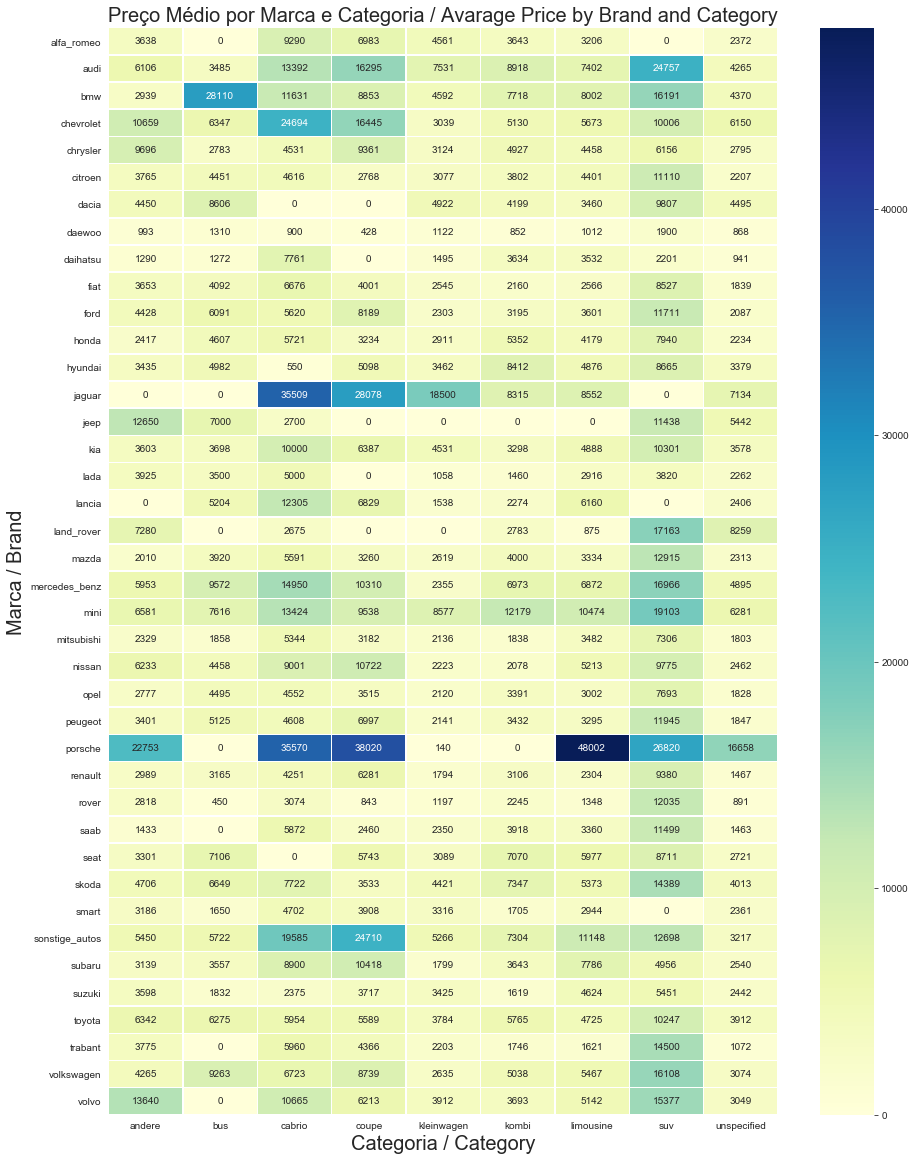

In [102]:
# Gráfico correspondente ao preço médio dos veículos a venda por marca e categoria
# Chart that represent the sale avarage price of vehicles by brand and category
serie = trial.pivot("Brand", "Vehicle Type", "Avg Price")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(serie, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")
ax.xaxis.set_label_text("Categoria / Category", fontsize=20)
ax.yaxis.set_label_text("Marca / Brand", fontsize=20)
ax.set_title("Preço Médio por Marca e Categoria / Avarage Price by Brand and Category", fontsize=20)